## Import Modules

In [1]:
import requests
import os, csv, psycopg2, utils
import json
from pathlib import Path
from jinja2 import Environment, FileSystemLoader

## Connexion base de données

In [2]:
ma_base_donnees = "Spinoff4"
utilisateur = "postgres"
mot_passe = os.environ.get("pg_psw")

In [3]:
def ouvrir_connection(nom_bdd, utilisateur, mot_passe, host='localhost', port=5432):
    
    try:
        conn = psycopg2.connect(dbname=nom_bdd, user=utilisateur, password=mot_passe, host=host, port=5432)
    except psycopg2.Error as e:
        print("Erreur lors de la connection à la base de données")
        print(e)
        return None
    conn.set_session(autocommit=True)
    
    return conn

In [4]:
conn = ouvrir_connection(ma_base_donnees, utilisateur, mot_passe)

type(conn)

psycopg2.extensions.connection

## Création table movies

In [5]:
def creer_table(conn, sql_creation_table):
    try:
        cursor = conn.cursor()
        cursor.execute(sql_creation_table)
        conn.commit()
    except psycopg2.Error as e:
        print("Erreur lors de la création de la table")
        print(e)
        return
    cursor.close()
    print("Les tables ont été créées avec succès")

Nous créons maintenant une table _movies_ avec 8 élements représentatifs du film. Par souci de lisibilité et de pertinence, les critères trop longs, peu utiles ou dont trop peu d'informations étaient remplies (près de la moitié des films ne possédaient pas de notes) n'ont pas été conservés.

In [6]:
sql_creer_tables = """
    CREATE TABLE IF NOT EXISTS movies (
    imdbID VARCHAR PRIMARY KEY NOT NULL,
    Title VARCHAR NOT NULL,
    Year VARCHAR,
    Director VARCHAR,
    Actors VARCHAR,
    Genre VARCHAR,
    Language VARCHAR,
    Country VARCHAR);
"""

In [7]:
creer_table(conn, sql_creer_tables)

Les tables ont été créées avec succès


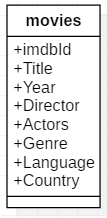

In [2]:
Image("C:/Users/levog/OneDrive/Images/uml.png")

## Insertion données

Nous créons maintenant une liste __data__ qui contiendra une sélection de films. L'outil Postman ne permettant pas de faire des requêtes précises à partir d'une API, et étant limité dans l'import de fichiers, nous choisisons une sélection aléatoire de film entre l'ID _tt1000100_ et l'id _tt1000120_, en prenant soin d'enlever les films de la catégories _Adulte_.

Nous la visualisons ensuite au format json. Il y a 17 films sélectionnés.

In [8]:
data=[]
for i in range(1000100,1000120):
    i= i+1
    q= str(i)
    response = requests.get('http://www.omdbapi.com/?type=movie&apikey=cd9da9b4&i=tt'+q)
    response_info = json.loads(response.text)
    if response_info['Response'] != 'False':
        if response_info['Genre'] != 'Adult':
            data.append([response_info['imdbID'], response_info['Title'], response_info['Year'], response_info['Director'], response_info['Actors'], response_info['Genre'], response_info['Language'], response_info['Country']])

In [9]:
def jprint(obj):
    text = json.dumps(obj, indent=4)
    print(text)

In [10]:
jprint(data)

[
    [
        "tt1000101",
        "He Loops to Conquer",
        "1924",
        "Edward Laemmle",
        "Billy Sullivan, Hayden Stevenson, Edgar Kennedy",
        "Short, Drama, Sport",
        "English",
        "USA"
    ],
    [
        "tt1000102",
        "Hold Me",
        "2006",
        "Lucia Rikaki",
        "Katerina Lypiridou, Takis Vogopoulos, Panos Kranidiotis, Marianna Calbari",
        "Drama",
        "English",
        "Greece"
    ],
    [
        "tt1000103",
        "Home Again",
        "1923",
        "N/A",
        "N/A",
        "Short, Music",
        "N/A",
        "USA"
    ],
    [
        "tt1000105",
        "Hototogisu",
        "1932",
        "Keigo Kimura",
        "Taisuke Matsumoto, Keiko Takatsu, Eiji Nakano",
        "N/A",
        "Japanese",
        "Japan"
    ],
    [
        "tt1000106",
        "Indelible",
        "2007",
        "Rick Amundson",
        "Paul Cram, Bill Dunbar, Rick Galbreath, J.D. Garfield",
        "Drama",
       

Nous créons maintenant une fonction pour insérer les données choisies dans la classe _movies_.

In [48]:
def inserer_donnees(conn, sql_insertion_table, donnees):
    try:
        cursor = conn.cursor()
        for d in donnees:
            cursor.execute(sql_insertion_table, d)
        conn.commit()
    except psycopg2.Error as e:
        print("Erreur lors de l'insertion des données")
        print(e)
        return
    cursor.close()
    print("Les données ont été insérées avec succès")

In [49]:
sql_inserer_movies = """
    INSERT INTO movies
    (imdbID, Title, Year, Director, Actors, Genre, Language, Country)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

In [50]:
inserer_donnees(conn, sql_inserer_movies, data)

Les données ont été insérées avec succès


Grâce à l'import de jinja2 et grâce au fichier _index.html_ situé dans le dossier _templates_ qui constitue un bloc HTML représentant le tableau dans lequel nous avons importé des données figurant dans la liste __data__, nous pouvons visualiser le tableau final dans le fichier _index.html_ du dossier _html_.

In [25]:
file_loader = FileSystemLoader('templates')
env = Environment(loader=file_loader, autoescape=True)

template = env.get_template('index.html')

filename = "html/index.html"
with open(filename, 'w') as addmovies:
    addmovies.write(template.render(movies=data))

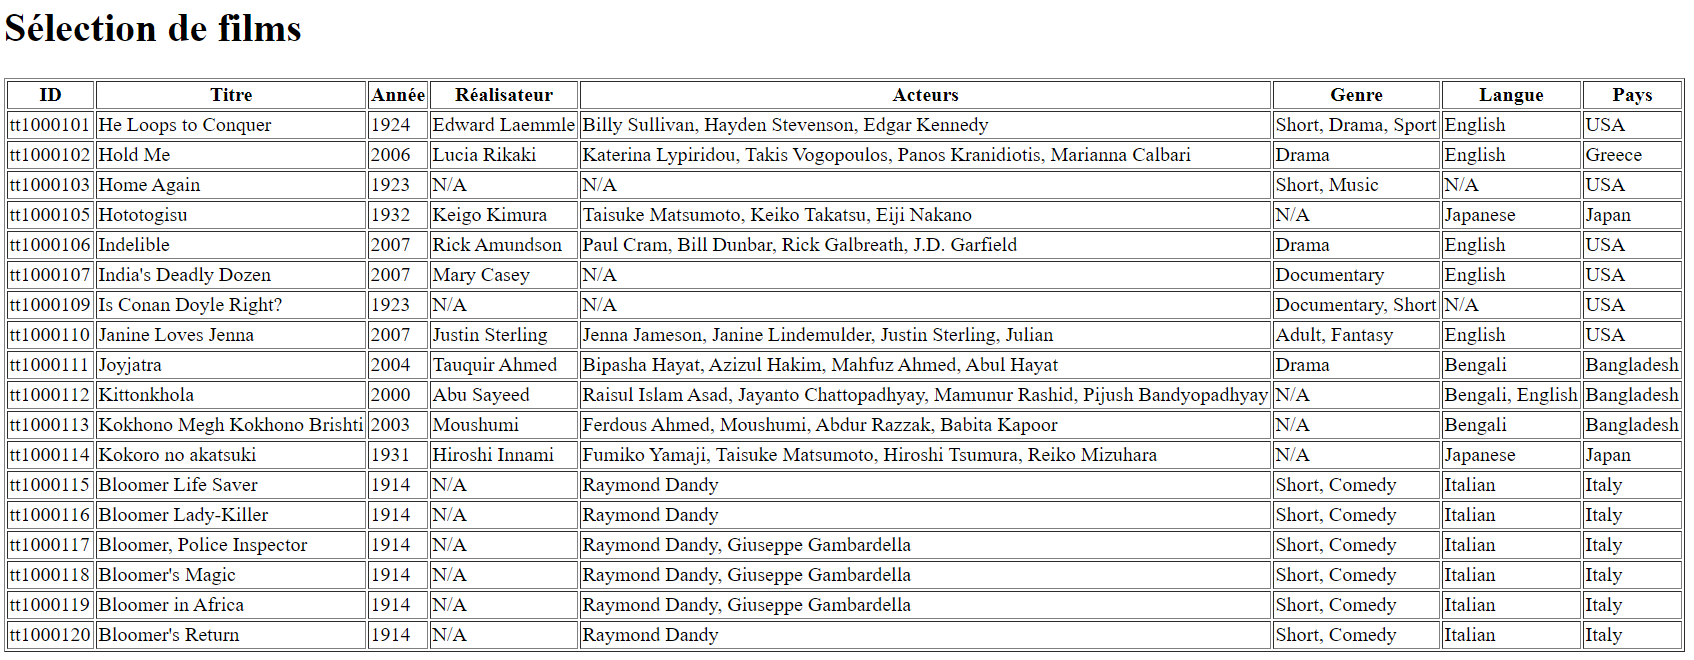

In [1]:
from IPython.display import Image
Image("C:/Users/levog/OneDrive/Images/Capture.png")